In [1]:
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

# set maximum display rows as 200
pd.set_option('display.max_rows', 200)

plt.style.use('ggplot') # use ggplot styling
# displays graphs in the notebook
%matplotlib inline

In [2]:
df = pd.read_sql_table('coffee_machine', 'sqlite:///dissertation.db') 

In [3]:
df_copy = df.copy()

In [4]:
df_copy

,time,mean_power,weekofyear,day_name,hour,mins,day_type,kWh
0,2019-12-23 00:00:00,0.0,-1,0,0,0,weekday,0.0
1,2019-12-23 00:00:10,0.0,-1,0,0,0,weekday,0.0
2,2019-12-23 00:00:20,0.0,-1,0,0,0,weekday,0.0
3,2019-12-23 00:00:30,0.0,-1,0,0,0,weekday,0.0
4,2019-12-23 00:00:40,0.0,-1,0,0,0,weekday,0.0
...,...,...,...,...,...,...,...,...
1451515,2020-06-07 23:59:10,0.0,23,6,23,59,holiday,0.0
1451516,2020-06-07 23:59:20,0.0,23,6,23,59,holiday,0.0
1451517,2020-06-07 23:59:30,0.0,23,6,23,59,holiday,0.0
1451518,2020-06-07 23:59:40,0.0,23,6,23,59,holiday,0.0


In [50]:
week = pd.DataFrame({'Week_kWh' : (df_copy.groupby( ['weekofyear'])['kWh'].sum())}).reset_index()
day = pd.DataFrame({'day_kWh' : (df_copy.groupby( ['day_name'])['kWh'].sum()/24)}).reset_index()
hour = pd.DataFrame({'hour_kWh' : (df_copy.groupby( ['hour'])['kWh'].sum()/24)}).reset_index()

In [51]:
week.describe()

,weekofyear,Week_kWh
count,24.000000,24.000000
mean,11.458333,4.987580
std,7.144345,5.630542
min,-1.000000,0.000022
25%,5.750000,0.000177
50%,11.500000,1.219669
75%,17.250000,11.167314
max,23.000000,12.742069


In [52]:
day

,day_name,day_kWh
0,0,0.887797
1,1,0.911679
2,2,0.915971
3,3,0.995631
4,4,0.976993
5,5,0.133038
6,6,0.166471


In [21]:
hour

,hour,hour_kWh
0,0,0.000003
1,1,0.000003
2,2,0.000002
3,3,0.000003
4,4,0.000002
5,5,0.000745
6,6,0.000062
7,7,0.008769
8,8,0.261497
9,9,0.756000


## Weekly Clustering Starts from Here

In [29]:
df_clustering =pd.read_sql_table('coffee_machine_tsfel', 'sqlite:///dissertation.db')

In [30]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     140 non-null    int64  
 1   0_Absolute energy         140 non-null    float64
 2   0_Mean                    140 non-null    float64
 3   0_Max                     140 non-null    float64
 4   0_Standard deviation      140 non-null    float64
 5   0_FFT mean coefficient_0  140 non-null    float64
 6   0_Spectral kurtosis       140 non-null    float64
 7   0_Skewness                140 non-null    float64
 8   0_Zero crossing rate      140 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 10.0 KB


In [31]:
df_clustering['time'] = pd.date_range(start="12/23/2019", end="05/10/2020", freq='D')

In [33]:
# prepare data for clustering
df_clustering['weekofyear']=df_clustering['time'].dt.week
df_clustering['day_categ']=df_clustering['time'].dt.day_name()
df_clustering['day_num']=df_clustering['time'].dt.weekday
df_clustering['day']=df_clustering['time'].dt.day


df_clustering['day_type'] = df_clustering['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_clustering.loc[(df_clustering.time >= '2019-12-24') & (df_clustering.time < '2019-12-26'), 'day_type']='holiday' #christmas
df_clustering.loc[(df_clustering.time == '2020-01-01'), 'day_type']='holiday' #new year
# lockdown week 13
df_clustering.loc[(df_clustering.weekofyear >12) & (df_clustering.weekofyear <25), 'day_type'] = 'holiday'

In [35]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     140 non-null    int64         
 1   0_Absolute energy         140 non-null    float64       
 2   0_Mean                    140 non-null    float64       
 3   0_Max                     140 non-null    float64       
 4   0_Standard deviation      140 non-null    float64       
 5   0_FFT mean coefficient_0  140 non-null    float64       
 6   0_Spectral kurtosis       140 non-null    float64       
 7   0_Skewness                140 non-null    float64       
 8   0_Zero crossing rate      140 non-null    float64       
 9   time                      140 non-null    datetime64[ns]
 10  weekofyear                140 non-null    int64         
 11  day_categ                 140 non-null    object        
 12  day_num               

In [36]:
df_clustering_ok=df_clustering.drop(['index','weekofyear','time','day','day_num'],axis=1)
df_clustering_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         140 non-null    float64
 1   0_Mean                    140 non-null    float64
 2   0_Max                     140 non-null    float64
 3   0_Standard deviation      140 non-null    float64
 4   0_FFT mean coefficient_0  140 non-null    float64
 5   0_Spectral kurtosis       140 non-null    float64
 6   0_Skewness                140 non-null    float64
 7   0_Zero crossing rate      140 non-null    float64
 8   day_categ                 140 non-null    object 
 9   day_type                  140 non-null    object 
dtypes: float64(8), object(2)
memory usage: 11.1+ KB


In [37]:
df_dum = pd.get_dummies(df_clustering_ok)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         140 non-null    float64
 1   0_Mean                    140 non-null    float64
 2   0_Max                     140 non-null    float64
 3   0_Standard deviation      140 non-null    float64
 4   0_FFT mean coefficient_0  140 non-null    float64
 5   0_Spectral kurtosis       140 non-null    float64
 6   0_Skewness                140 non-null    float64
 7   0_Zero crossing rate      140 non-null    float64
 8   day_categ_Friday          140 non-null    uint8  
 9   day_categ_Monday          140 non-null    uint8  
 10  day_categ_Saturday        140 non-null    uint8  
 11  day_categ_Sunday          140 non-null    uint8  
 12  day_categ_Thursday        140 non-null    uint8  
 13  day_categ_Tuesday         140 non-null    uint8  
 14  day_categ_

In [38]:
df_dum.corr()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ_Friday,day_categ_Monday,day_categ_Saturday,day_categ_Sunday,day_categ_Thursday,day_categ_Tuesday,day_categ_Wednesday,day_type_holiday,day_type_weekday,day_type_weekend
0_Absolute energy,1.000000,0.995417,0.877770,0.972389,0.781683,0.403496,-0.665762,0.942414,0.136928,0.070424,-0.273396,-0.249594,0.139689,0.084346,0.091603,-0.652158,0.832019,-0.252446
0_Mean,0.995417,1.000000,0.870245,0.968852,0.772599,0.373712,-0.667850,0.968600,0.127811,0.084707,-0.280031,-0.263875,0.136818,0.096248,0.098322,-0.648319,0.844025,-0.272551
0_Max,0.877770,0.870245,1.000000,0.951797,0.718806,0.676208,-0.635814,0.811133,0.074707,0.016030,-0.108369,-0.096057,0.084522,0.026209,0.002959,-0.847690,0.746596,0.099622
0_Standard deviation,0.972389,0.968852,0.951797,1.000000,0.781759,0.545632,-0.688463,0.916224,0.115096,0.072691,-0.221704,-0.181364,0.100101,0.066292,0.048888,-0.763714,0.826838,-0.107217
0_FFT mean coefficient_0,0.781683,0.772599,0.718806,0.781759,1.000000,0.346942,-0.544479,0.711511,0.149282,-0.036050,-0.242453,-0.144928,0.190527,-0.021486,0.105108,-0.545645,0.660771,-0.166050
0_Spectral kurtosis,0.403496,0.373712,0.676208,0.545632,0.346942,1.000000,-0.167935,0.276865,0.019457,0.013231,0.175201,0.070914,-0.071829,-0.038106,-0.168867,-0.608809,0.281387,0.397034
0_Skewness,-0.665762,-0.667850,-0.635814,-0.688463,-0.544479,-0.167935,1.000000,-0.644564,0.024580,-0.058773,0.242662,0.159402,-0.091011,-0.107212,-0.169648,0.545213,-0.594650,0.082127
0_Zero crossing rate,0.942414,0.968600,0.811133,0.916224,0.711511,0.276865,-0.644564,1.000000,0.122176,0.123528,-0.290178,-0.290741,0.129159,0.117783,0.088273,-0.596292,0.833206,-0.323375
day_categ_Friday,0.136928,0.127811,0.074707,0.115096,0.149282,0.019457,0.024580,0.122176,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,0.170247,-0.194966
day_categ_Monday,0.070424,0.084707,0.016030,0.072691,-0.036050,0.013231,-0.058773,0.123528,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,0.170247,-0.194966


<Figure size 2160x720 with 0 Axes>

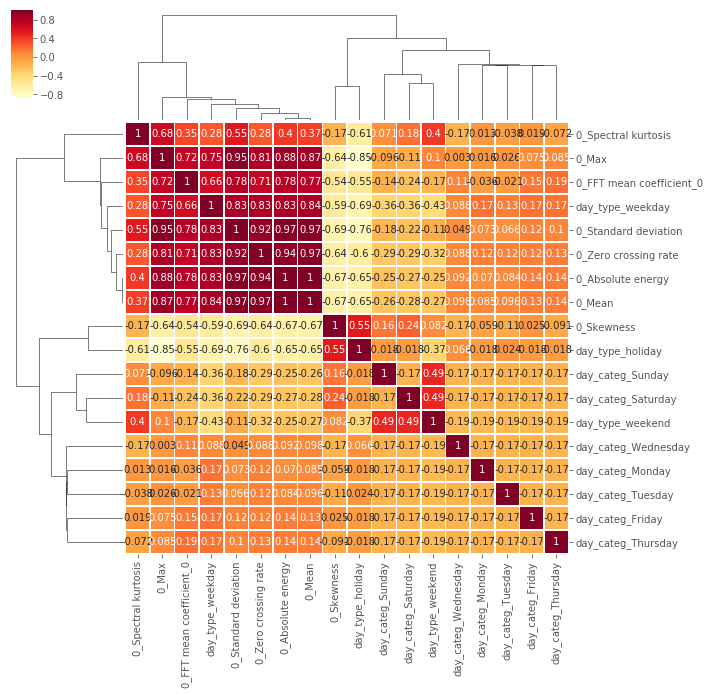

In [39]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))

corr = df_dum.corr()

ax_ =sns.clustermap(corr,linewidth=0.5 ,cmap="YlOrRd",annot=True,annot_kws={"size": 10})

In [40]:
from sklearn.cluster import KMeans

In [43]:
# before clustering the values needing scaled 
import sklearn.preprocessing as preprocessing
df_scaled = preprocessing.scale(df_dum) 

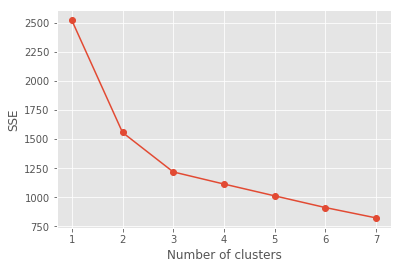

In [44]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 7
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [46]:
k_cluster = 2 
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(df_scaled)

KMeans(n_clusters=2, random_state=1)

In [47]:
# assign labels to original dataframe
df_label=df_clustering_ok.assign(label=kmeans_method.labels_)

In [48]:
df_label.loc[df_label.label==0]

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,day_type,label
0,0.003542,0.000060,0.007736,0.000637,1.769830e-09,3.780218,11.359218,66.0,Monday,weekday,0
4,0.004487,0.000068,0.007882,0.000717,1.863359e-09,4.393796,10.534546,10.0,Friday,weekday,0
8,0.002372,0.000037,0.007825,0.000523,4.039440e-09,5.196683,14.444346,6.0,Tuesday,weekday,0
10,0.005137,0.000110,0.012150,0.000763,9.908286e-09,2.922293,8.905461,396.0,Thursday,weekday,0
11,0.007418,0.000149,0.007951,0.000914,1.610756e-08,2.968296,7.338400,412.0,Friday,weekday,0
14,0.012552,0.000249,0.011617,0.001179,1.748904e-08,2.988126,5.678056,634.0,Monday,weekday,0
15,0.011588,0.000230,0.009994,0.001135,9.323440e-09,3.043200,5.791049,586.0,Tuesday,weekday,0
16,0.011205,0.000244,0.011848,0.001112,1.414005e-08,2.923597,5.775338,708.0,Wednesday,weekday,0
17,0.011870,0.000262,0.011804,0.001142,5.467729e-09,2.826348,5.612601,840.0,Thursday,weekday,0
18,0.010658,0.000216,0.011897,0.001089,6.242861e-09,2.855104,6.203494,606.0,Friday,weekday,0


In [49]:
df_label.loc[df_label.label==1]

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,day_type,label
1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,Tuesday,holiday,1
2,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,Wednesday,holiday,1
3,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,Thursday,weekday,1
5,4.059891e-03,6.210030e-05,0.007857,6.826700e-04,2.218936e-09,4.338863,11.059196,10.0,Saturday,weekend,1
6,4.707661e-03,7.215046e-05,0.007845,7.346172e-04,5.127882e-09,4.246006,10.185218,12.0,Sunday,weekend,1
7,2.162998e-03,3.273224e-05,0.007891,4.992751e-04,7.647791e-10,4.263552,15.254256,4.0,Monday,weekday,1
9,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,Wednesday,holiday,1
12,1.272779e-03,1.959486e-05,0.007733,3.833125e-04,5.477653e-10,6.215063,19.713802,2.0,Saturday,weekend,1
13,1.005832e-03,1.553022e-05,0.007833,3.408438e-04,1.826002e-10,3.997143,22.271730,4.0,Sunday,weekend,1
19,2.590260e-03,4.571423e-05,0.007969,5.456270e-04,3.169635e-09,3.613872,13.375897,78.0,Saturday,weekend,1


## Daily Clustering Starts from Here

In [66]:
df_hour = pd.read_sql_table('coffee_machine_hourtsfel', 'sqlite:///dissertation.db')

In [67]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3360 non-null   int64  
 1   0_Absolute energy         3360 non-null   float64
 2   0_Mean                    3360 non-null   float64
 3   0_Max                     3360 non-null   float64
 4   0_Standard deviation      3360 non-null   float64
 5   0_FFT mean coefficient_0  3360 non-null   float64
 6   0_Spectral kurtosis       3360 non-null   float64
 7   0_Skewness                3360 non-null   float64
 8   0_Zero crossing rate      3360 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 236.4 KB


In [68]:
df_hour['time'] = pd.date_range(start="12/23/2019 00:00:00", end="05/10/2020 23:00:00", freq='H')

In [69]:
# prepare data for clustering
df_hour['weekofyear']=df_hour['time'].dt.week
df_hour['day_categ']=df_hour['time'].dt.day_name()
df_hour['day_num']=df_hour['time'].dt.weekday
df_hour['day']=df_hour['time'].dt.day
df_hour['hour']=df_hour['time'].dt.hour
df_hour['hour']=df_hour['hour'].astype('object')

df_hour['day_type'] = df_hour['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_hour.loc[(df_hour.time >= '2019-12-24 00:00:00') & (df_hour.time < '2019-12-26 00:00:00'), 'day_type']='holiday' #christmas
df_hour.loc[(df_hour.time >= '2020-01-01 00:00:00') & (df_hour.time < '2020-01-02 00:00:00'), 'day_type']='holiday' #new year
# lockdown week 13
df_hour.loc[(df_hour.weekofyear >12) & (df_hour.weekofyear <25), 'day_type'] = 'holiday'

In [70]:
df_hour_ok=df_hour.drop(['index','weekofyear','time','day','day_num'],axis=1)
df_hour_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         3360 non-null   float64
 1   0_Mean                    3360 non-null   float64
 2   0_Max                     3360 non-null   float64
 3   0_Standard deviation      3360 non-null   float64
 4   0_FFT mean coefficient_0  3360 non-null   float64
 5   0_Spectral kurtosis       3360 non-null   float64
 6   0_Skewness                3360 non-null   float64
 7   0_Zero crossing rate      3360 non-null   float64
 8   day_categ                 3360 non-null   object 
 9   hour                      3360 non-null   object 
 10  day_type                  3360 non-null   object 
dtypes: float64(8), object(3)
memory usage: 288.9+ KB


In [71]:
df_hour_dum = pd.get_dummies(df_hour_ok)
df_hour_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         3360 non-null   float64
 1   0_Mean                    3360 non-null   float64
 2   0_Max                     3360 non-null   float64
 3   0_Standard deviation      3360 non-null   float64
 4   0_FFT mean coefficient_0  3360 non-null   float64
 5   0_Spectral kurtosis       3360 non-null   float64
 6   0_Skewness                3360 non-null   float64
 7   0_Zero crossing rate      3360 non-null   float64
 8   day_categ_Friday          3360 non-null   uint8  
 9   day_categ_Monday          3360 non-null   uint8  
 10  day_categ_Saturday        3360 non-null   uint8  
 11  day_categ_Sunday          3360 non-null   uint8  
 12  day_categ_Thursday        3360 non-null   uint8  
 13  day_categ_Tuesday         3360 non-null   uint8  
 14  day_cate

In [72]:
df_hour_dum.corr()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ_Friday,day_categ_Monday,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_type_holiday,day_type_weekday,day_type_weekend
0_Absolute energy,1.000000,0.982846,0.880965,0.959397,0.502819,0.677198,-0.056341,0.757153,6.198339e-02,3.187886e-02,...,-7.260879e-04,-5.372801e-02,-6.689057e-02,-8.001113e-02,-7.261964e-02,-8.007765e-02,-8.007765e-02,-2.952130e-01,3.766312e-01,-1.142749e-01
0_Mean,0.982846,1.000000,0.899775,0.963789,0.472285,0.672587,-0.057835,0.852727,6.131997e-02,4.063988e-02,...,-1.604919e-04,-5.044363e-02,-6.987896e-02,-8.406273e-02,-7.871096e-02,-8.437324e-02,-8.437317e-02,-3.110438e-01,4.049379e-01,-1.307619e-01
0_Max,0.880965,0.899775,1.000000,0.966631,0.460576,0.778642,-0.025236,0.817071,6.944686e-02,4.192265e-02,...,6.015247e-02,-2.275765e-02,-5.960337e-02,-9.545274e-02,-8.129795e-02,-9.624834e-02,-9.624304e-02,-3.547106e-01,4.179724e-01,-9.315431e-02
0_Standard deviation,0.959397,0.963789,0.966631,1.000000,0.491245,0.770286,-0.043485,0.811878,6.453338e-02,4.007846e-02,...,3.332610e-02,-3.751608e-02,-6.646645e-02,-9.232465e-02,-8.048412e-02,-9.290966e-02,-9.290852e-02,-3.424850e-01,4.134043e-01,-1.025099e-01
0_FFT mean coefficient_0,0.502819,0.472285,0.460576,0.491245,1.000000,0.370841,-0.023827,0.317899,-4.784958e-04,4.300545e-02,...,-1.422311e-03,-1.315203e-02,-3.711499e-02,-4.135586e-02,-4.031474e-02,-4.137988e-02,-4.137988e-02,-1.525505e-01,1.728786e-01,-3.127623e-02
0_Spectral kurtosis,0.677198,0.672587,0.778642,0.770286,0.370841,1.000000,0.518801,0.579263,5.771459e-02,4.074428e-02,...,7.404081e-02,1.809483e-03,-6.020810e-02,-9.002145e-02,-8.102593e-02,-1.129686e-01,-9.680837e-02,-5.156986e-02,1.745712e-01,-1.589088e-01
0_Skewness,-0.056341,-0.057835,-0.025236,-0.043485,-0.023827,0.518801,1.000000,-0.013235,3.787854e-03,3.500154e-02,...,1.952481e-02,1.637609e-03,-1.011634e-02,-1.570582e-02,-3.314997e-02,-6.100489e-02,-2.508079e-02,4.519746e-01,-2.772950e-01,-2.073902e-01
0_Zero crossing rate,0.757153,0.852727,0.817071,0.811878,0.317899,0.579263,-0.013235,1.000000,6.012433e-02,6.095961e-02,...,2.599963e-02,-1.749155e-02,-6.400565e-02,-8.375220e-02,-8.521491e-02,-8.565372e-02,-8.536118e-02,-2.939789e-01,4.107877e-01,-1.594375e-01
day_categ_Friday,0.061983,0.061320,0.069447,0.064533,-0.000478,0.057715,0.003788,0.060124,1.000000e+00,-1.666667e-01,...,5.640974e-17,5.643927e-17,5.646880e-17,5.661647e-17,6.621499e-17,7.534096e-17,7.537050e-17,-1.810517e-02,1.702469e-01,-1.949659e-01
day_categ_Monday,0.031879,0.040640,0.041923,0.040078,0.043005,0.040744,0.035002,0.060960,-1.666667e-01,1.000000e+00,...,5.640974e-17,5.643927e-17,5.646880e-17,5.661647e-17,6.621499e-17,7.534096e-17,7.537050e-17,-1.810517e-02,1.702469e-01,-1.949659e-01


<Figure size 2160x720 with 0 Axes>

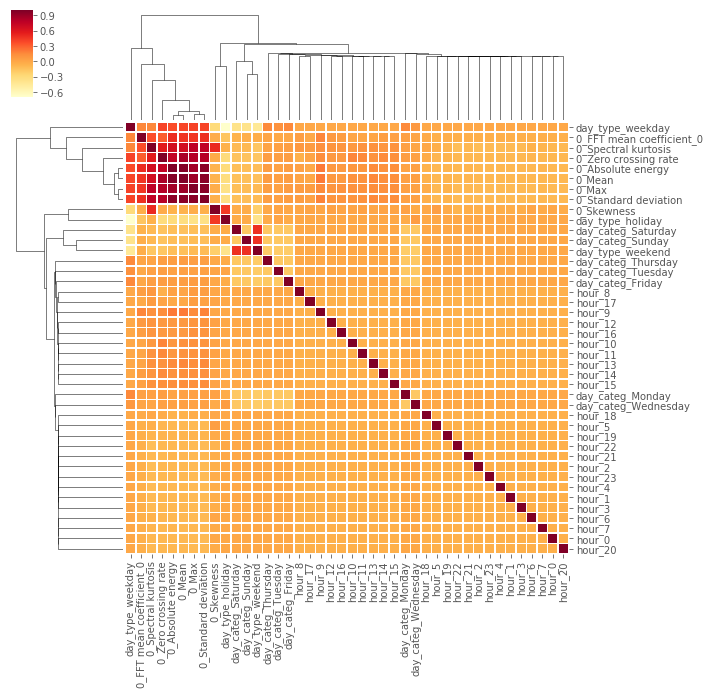

In [74]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))

corr_hour = df_hour_dum.corr()

ax_ =sns.clustermap(corr_hour,linewidth=0.5 ,cmap="YlOrRd",annot=False,annot_kws={"size": 10})

In [75]:
df_hour_scaled = preprocessing.scale(df_hour_dum) 

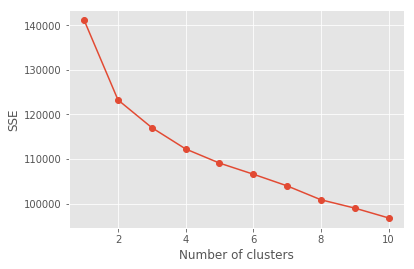

In [114]:
# calculate SSE for a range of number of cluster
hour_list_SSE = []
hour_min_k = 1
hour_max_k = 10
hour_range_k = range(hour_min_k, hour_max_k+1)
for i in hour_range_k:
    hour_km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        tol=1e-04, random_state=0
    )
    hour_km.fit(df_hour_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    hour_list_SSE.append(hour_km.inertia_)

# plot
plt.plot(hour_range_k, hour_list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

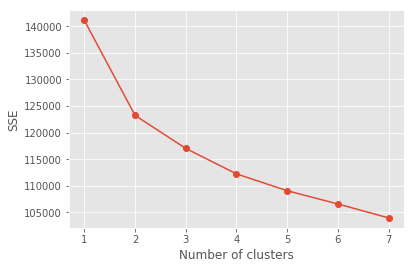

In [116]:
# calculate SSE for a range of number of cluster
hour_list_SSE = []
hour_min_k = 1
hour_max_k = 7
hour_range_k = range(hour_min_k, hour_max_k+1)
for i in hour_range_k:
    hour_km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        tol=1e-04, random_state=0
    )
    hour_km.fit(df_hour_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    hour_list_SSE.append(hour_km.inertia_)

# plot
plt.plot(hour_range_k, hour_list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [102]:
hour_k_cluster = 2
random_seed = 1
hour_kmeans_method = KMeans(n_clusters=hour_k_cluster,random_state=random_seed)
hour_kmeans_method.fit(df_hour_scaled)

KMeans(n_clusters=2, random_state=1)

In [103]:
df_hour_label=df_hour_ok.assign(label=hour_kmeans_method.labels_)

In [106]:
df_hour_gr1=df_hour_label.loc[df_hour_label.label==1]

In [121]:
pd.set_option('display.max_rows', None)

In [124]:
df_hour_gr2=df_hour_label.loc[df_hour_label.label==0]

In [130]:
df_hour_gr1.groupby(['hour']).count()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,day_type,label
hour,,,,,,,,,,,
7,2,2,2,2,2,2,2,2,2,2,2
8,39,39,39,39,39,39,39,39,39,39,39
9,62,62,62,62,62,62,62,62,62,62,62
10,53,53,53,53,53,53,53,53,53,53,53
11,55,55,55,55,55,55,55,55,55,55,55
12,56,56,56,56,56,56,56,56,56,56,56
13,61,61,61,61,61,61,61,61,61,61,61
14,55,55,55,55,55,55,55,55,55,55,55
15,56,56,56,56,56,56,56,56,56,56,56


In [126]:
df_hour_gr2

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,0_Zero crossing rate,day_categ,hour,day_type,label
0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,Monday,0,weekday,0
1,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,Monday,1,weekday,0
2,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,Monday,2,weekday,0
3,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,Monday,3,weekday,0
4,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,Monday,4,weekday,0
5,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,Monday,5,weekday,0
6,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,Monday,6,weekday,0
7,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,Monday,7,weekday,0
9,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,Monday,9,weekday,0
10,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,Monday,10,weekday,0


In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Kwh', dpi=100):
    plt.figure(figsize=(16,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()